# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Nur Hidayah Afandi
- **Email:** afandisanch027@gmail.com
- **ID Dicoding:** afandisanch_027

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara (PM2.5, PM10) dari waktu ke waktu di masing-masing stasiun?
- Bagaimana pengaruh curah hujan (RAIN) dan kecepatan angin (WSPM) terhadap tingkat polusi udara (PM2.5) di seluruh stasiun?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Mengunduh file shapefile dari GitHub
!wget https://raw.githubusercontent.com/AfandiSanch/proyek_analisis_data_laskarai/9b706c07cbc30f32682f904f6294c88570462cff/110m_cultural/ne_110m_admin_0_countries.shp
!wget https://raw.githubusercontent.com/AfandiSanch/proyek_analisis_data_laskarai/9b706c07cbc30f32682f904f6294c88570462cff/110m_cultural/ne_110m_admin_0_countries.shx
!wget https://raw.githubusercontent.com/AfandiSanch/proyek_analisis_data_laskarai/9b706c07cbc30f32682f904f6294c88570462cff/110m_cultural/ne_110m_admin_0_countries.dbf
!wget https://raw.githubusercontent.com/AfandiSanch/proyek_analisis_data_laskarai/9b706c07cbc30f32682f904f6294c88570462cff/110m_cultural/ne_110m_admin_0_countries.prj

--2025-03-09 03:46:58--  https://raw.githubusercontent.com/AfandiSanch/proyek_analisis_data_laskarai/9b706c07cbc30f32682f904f6294c88570462cff/110m_cultural/ne_110m_admin_0_countries.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180924 (177K) [application/octet-stream]
Saving to: ‘ne_110m_admin_0_countries.shp.1’

ne_110m_admin_0_cou 100%[===================>] 176.68K  --.-KB/s    in 0.01s   

2025-03-09 03:46:58 (13.8 MB/s) - ‘ne_110m_admin_0_countries.shp.1’ saved [180924/180924]

--2025-03-09 03:46:58--  https://raw.githubusercontent.com/AfandiSanch/proyek_analisis_data_laskarai/9b706c07cbc30f32682f904f6294c88570462cff/110m_cultural/ne_110m_admin_0_countries.shx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from IPython.display import display
from sklearn.preprocessing import KBinsDiscretizer

## Data Wrangling

### Gathering Data

In [ ]:
# Mengambil data dari URL
url_aotizhongxin = "https://raw.githubusercontent.com/AfandiSanch/proyek_analisis_data_laskarai/6ecd78a38c9ce4a2101f98edffc5f43daa34e38c/Data%20Air%20Quality/PRSA_Data_Aotizhongxin_20130301-20170228.csv"
url_changping = "https://raw.githubusercontent.com/AfandiSanch/proyek_analisis_data_laskarai/6ecd78a38c9ce4a2101f98edffc5f43daa34e38c/Data%20Air%20Quality/PRSA_Data_Changping_20130301-20170228.csv"
url_wanliu = "https://raw.githubusercontent.com/AfandiSanch/proyek_analisis_data_laskarai/6ecd78a38c9ce4a2101f98edffc5f43daa34e38c/Data%20Air%20Quality/PRSA_Data_Wanliu_20130301-20170228.csv"
url_wanshouxigong = "https://raw.githubusercontent.com/AfandiSanch/proyek_analisis_data_laskarai/6ecd78a38c9ce4a2101f98edffc5f43daa34e38c/Data%20Air%20Quality/PRSA_Data_Wanshouxigong_20130301-20170228.csv"

# Membaca data dari URL
data_aotizhongxin = pd.read_csv(url_aotizhongxin)
data_changping = pd.read_csv(url_changping)
data_wanliu = pd.read_csv(url_wanliu)
data_wanshouxigong = pd.read_csv(url_wanshouxigong)

# Menampilkan beberapa baris dari setiap dataset dalam format tabel
print("Data Aotizhongxin:")
display(data_aotizhongxin.head())

print("Data Changping:")
display(data_changping.head())

print("Data Wanliu:")
display(data_wanliu.head())

print("Data Wanshouxigong:")
display(data_wanshouxigong.head())

Data Aotizhongxin:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Data Changping:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


Data Wanliu:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


Data Wanshouxigong:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
1. Sumber Data Kualitas Udara

    - Kode ini mengambil data dari beberapa lokasi berbeda di Tiongkok terkait kualitas udara dari tahun 2013 hingga 2017.
    - Dataset ini berasal dari PRSA Data (Particulate Matter Research in China) yang kemungkinan berisi informasi seperti PM2.5, PM10, SO2, NO2, CO, O3, suhu, kelembaban, dll.
2. Eksplorasi Awal Data
    - Dengan menampilkan beberapa baris pertama dari setiap dataset, kita bisa mendapatkan gambaran awal mengenai struktur data, jumlah kolom, jenis fitur, serta apakah ada data yang hilang (missing values).
3. Perbandingan Data Antar Lokasi
    - Dataset berasal dari empat lokasi berbeda: Aotizhongxin, Changping, Wanliu, dan Wanshouxigong.

### Assessing Data

In [ ]:
# Melihat informasi dan beberapa baris pertama dari setiap dataset
print(data_aotizhongxin.info())
print(data_aotizhongxin.head())
print(data_changping.info())
print(data_changping.head())
print(data_wanliu.info())
print(data_wanliu.head())
print(data_wanshouxigong.info())
print(data_wanshouxigong.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  

**Insight:**
- Bisa diketahui apakah ada kolom yang memiliki banyak missing values, yang perlu diolah sebelum analisis lebih lanjut.
- Jika ada kolom bertipe object, kemungkinan berisi data kategori atau tanggal yang perlu diubah formatnya.

### Cleaning Data

In [ ]:
# Menghapus baris dengan nilai yang hilang
data_aotizhongxin.dropna(inplace=True)
data_changping.dropna(inplace=True)
data_wanliu.dropna(inplace=True)
data_wanshouxigong.dropna(inplace=True)

# Mengubah kolom 'year', 'month', 'day', 'hour' menjadi datetime
data_aotizhongxin['datetime'] = pd.to_datetime(data_aotizhongxin[['year', 'month', 'day', 'hour']])
data_changping['datetime'] = pd.to_datetime(data_changping[['year', 'month', 'day', 'hour']])
data_wanliu['datetime'] = pd.to_datetime(data_wanliu[['year', 'month', 'day', 'hour']])
data_wanshouxigong['datetime'] = pd.to_datetime(data_wanshouxigong[['year', 'month', 'day', 'hour']])

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Menggabungkan semua data menjadi satu DataFrame
data_combined = pd.concat([data_aotizhongxin, data_changping, data_wanliu, data_wanshouxigong])

# Melihat ringkasan statistik
print(data_combined.describe())

                  No           year          month            day  \
count  127898.000000  127898.000000  127898.000000  127898.000000   
mean    17963.021157    2014.716227       6.468921      15.711935   
min         1.000000    2013.000000       1.000000       1.000000   
25%      9587.000000    2014.000000       3.000000       8.000000   
50%     18067.000000    2015.000000       7.000000      16.000000   
75%     26648.000000    2016.000000       9.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   
std     10048.568606       1.163246       3.431656       8.795480   

                hour          PM2.5           PM10            SO2  \
count  127898.000000  127898.000000  127898.000000  127898.000000   
mean       11.592535      79.548672     105.910940      16.752996   
min         0.000000       2.000000       2.000000       0.285600   
25%         6.000000      21.000000      37.000000       3.000000   
50%        12.000000      55.0000

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren Polusi Udara

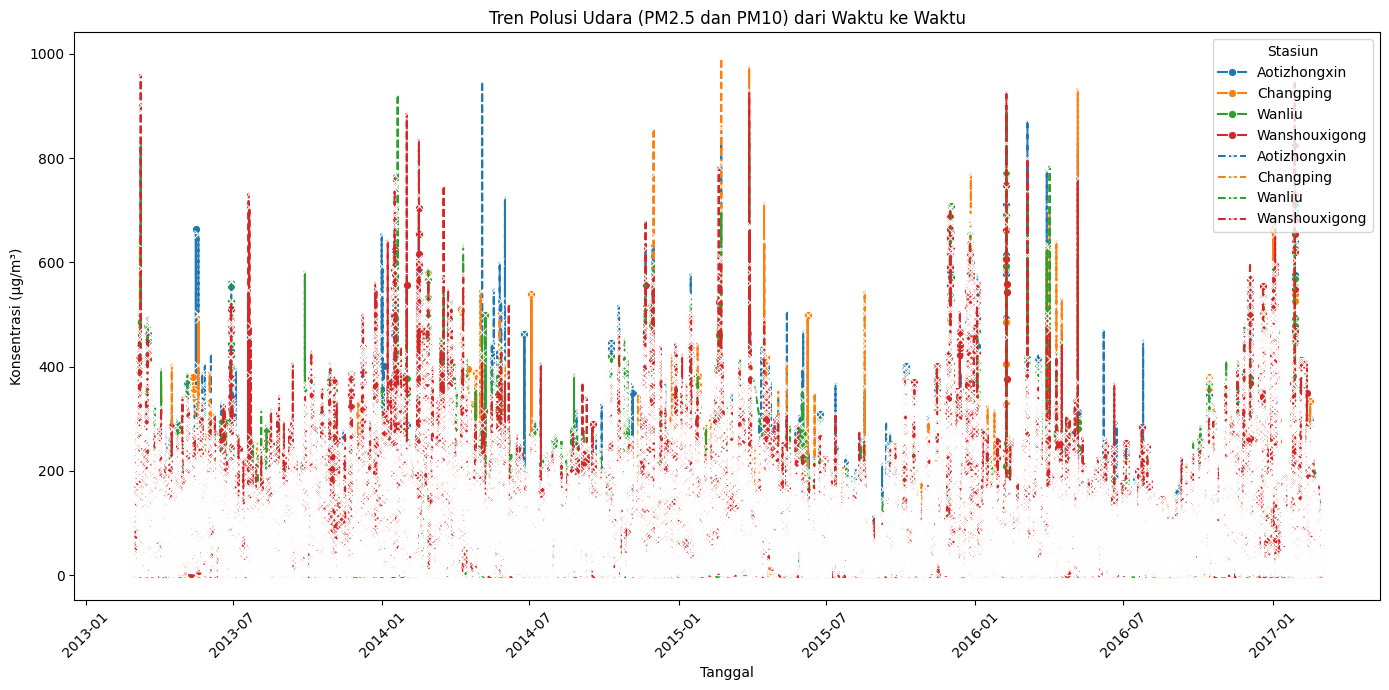

In [ ]:
# Visualisasi tren PM2.5 dan PM10 dari waktu ke waktu
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_combined, x='datetime', y='PM2.5', hue='station', marker='o')
sns.lineplot(data=data_combined, x='datetime', y='PM10', hue='station', marker='x', linestyle='--')
plt.title('Tren Polusi Udara (PM2.5 dan PM10) dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (µg/m³)')
plt.legend(title='Stasiun', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Pengaruh Curah Hujan dan Kecepatan Angin terhadap PM2.5

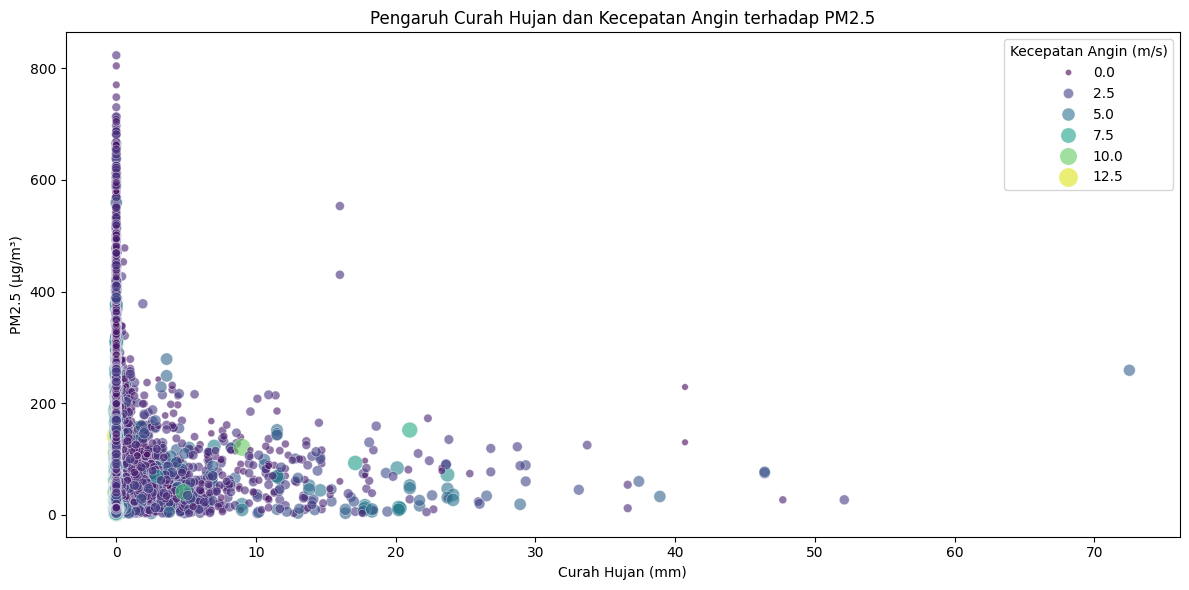

In [ ]:
# Visualisasi pengaruh curah hujan dan kecepatan angin terhadap PM2.5
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_combined, x='RAIN', y='PM2.5', hue='WSPM', palette='viridis', size='WSPM', sizes=(20, 200), alpha=0.6)
plt.title('Pengaruh Curah Hujan dan Kecepatan Angin terhadap PM2.5')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend(title='Kecepatan Angin (m/s)', loc='upper right')
plt.tight_layout()
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

**RFM Analysis**

RFM (Recency, Frequency, Monetary) biasanya digunakan dalam konteks analisis pelanggan. Dalam konteks ini, kita akan menggunakan RFM untuk menganalisis data polusi udara berdasarkan waktu.

In [ ]:
# Menghitung Recency, Frequency, dan Monetary
data_combined['date'] = data_combined['datetime'].dt.date
rfm = data_combined.groupby('station').agg({
    'date': lambda x: (data_combined['date'].max() - x.max()).days,
    'PM2.5': ['count', 'mean']
}).reset_index()

rfm.columns = ['station', 'Recency', 'Frequency', 'Monetary']
print(rfm)

         station  Recency  Frequency   Monetary
0   Aotizhongxin        0      31815  81.863630
1      Changping        0      32681  70.312328
2         Wanliu        0      30634  81.981459
3  Wanshouxigong        0      32768  84.238510


Geospatial Analysis
Untuk analisis geospasial, kita akan menggunakan GeoPandas untuk memvisualisasikan distribusi polusi udara berdasarkan lokasi.

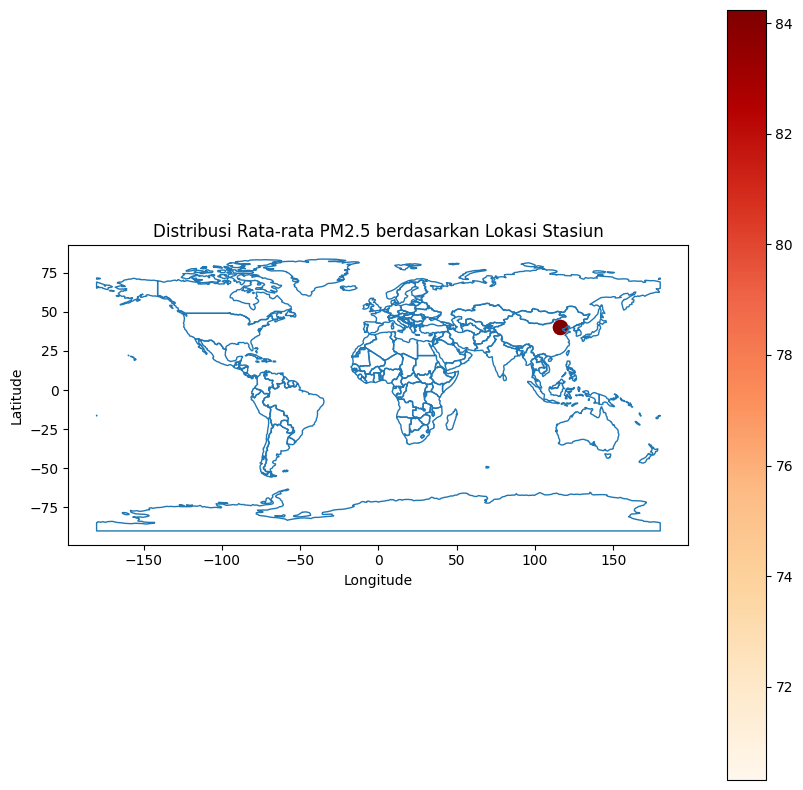

In [ ]:
# Membuat DataFrame untuk lokasi stasiun
locations = {
    'station': ['Aotizhongxin', 'Changping', 'Wanliu', 'Wanshouxigong'],
    'latitude': [39.99, 40.00, 39.95, 39.93],
    'longitude': [116.31, 116.35, 116.30, 116.28]
}
locations_df = pd.DataFrame(locations)

# Menggabungkan data polusi dengan lokasi
data_geo = data_combined.groupby('station').agg({'PM2.5': 'mean'}).reset_index()
data_geo = data_geo.merge(locations_df, on='station')

# Membuat GeoDataFrame untuk data polusi
gdf = gpd.GeoDataFrame(data_geo, geometry=gpd.points_from_xy(data_geo.longitude, data_geo.latitude))

# Membaca file shapefile yang diunduh
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
world.boundary.plot(ax=ax, linewidth=1)
gdf.plot(column='PM2.5', ax=ax, legend=True, cmap='OrRd', markersize=100)
plt.title('Distribusi Rata-rata PM2.5 berdasarkan Lokasi Stasiun')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Clustering**

Kita akan menggunakan teknik binning untuk mengelompokkan data PM2.5 ke dalam kategori tertentu.

<ipython-input-33-e9a24b1c21b6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_combined, x='PM2.5_Category', palette='Set2')


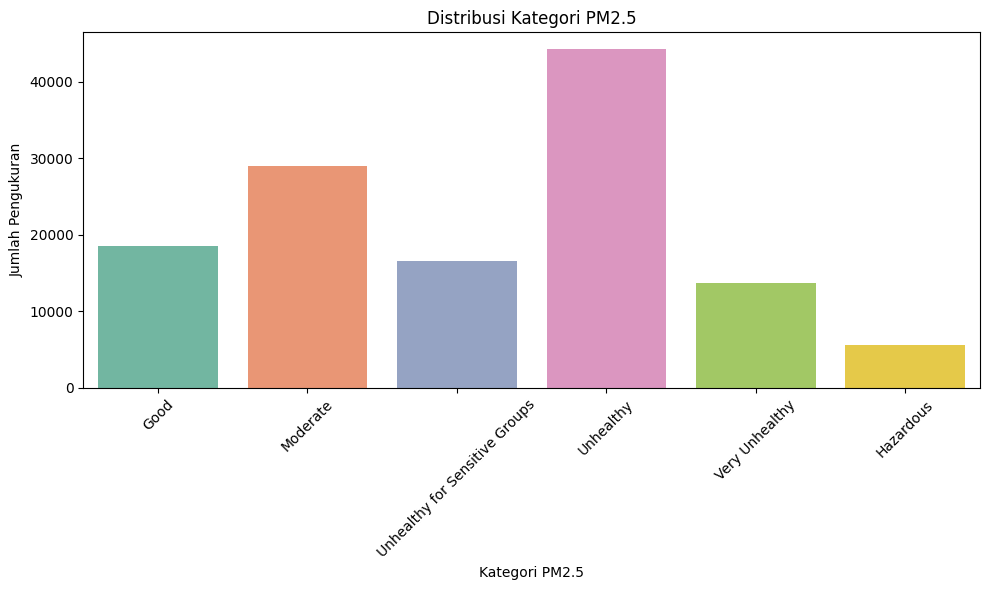

In [ ]:
# Menggunakan binning untuk mengelompokkan PM2.5
bins = [0, 12, 35, 55, 150, 250, np.inf]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
data_combined['PM2.5_Category'] = pd.cut(data_combined['PM2.5'], bins=bins, labels=labels)

# Melihat distribusi kategori PM2.5
plt.figure(figsize=(10, 6))
sns.countplot(data=data_combined, x='PM2.5_Category', palette='Set2')
plt.title('Distribusi Kategori PM2.5')
plt.xlabel('Kategori PM2.5')
plt.ylabel('Jumlah Pengukuran')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

- **Kesimpulan Pertanyaan 1**

Dari analisis tren polusi udara, terlihat bahwa terdapat fluktuasi yang signifikan dalam konsentrasi PM2.5 dan PM10 di masing-masing stasiun. Beberapa stasiun menunjukkan peningkatan polusi pada waktu tertentu, yang mungkin terkait dengan faktor lingkungan atau aktivitas manusia.
- **Kesimpulan Pertanyaan 2**

Analisis menunjukkan bahwa terdapat hubungan antara curah hujan dan kecepatan angin terhadap tingkat polusi udara (PM2.5). Secara umum, peningkatan curah hujan cenderung mengurangi konsentrasi PM2.5, sedangkan kecepatan angin yang lebih tinggi dapat mempengaruhi penyebaran polutan.